In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
img_width , img_height = 224 , 224
nb_train_samples = 1000
nb_validation_samples = 200
epochs = 10
batch_size = 32

In [ ]:
train_data_dir = '/content/drive/MyDrive/Research/Computer Vision/ImageClassification/DOGvsCOW/train'
validation_data_dir = '/content/drive/MyDrive/Research/Computer Vision/ImageClassification/DOGvsCOW/validation'
test_data_dir = '/content/drive/MyDrive/Research/Computer Vision/ImageClassification/DOGvsCOW/test'
test_data_dir1 = '/content/drive/MyDrive/Research/Computer Vision/ImageClassification/DOGvsCOW/test/cats'

In [ ]:
train_generator = train_generator.flow_from_directory(
	train_data_dir,
	target_size = (img_width,img_height),
	batch_size = batch_size,
	class_mode = 'categorical'
)

validation_generator = test_generator.flow_from_directory(
	validation_data_dir,
	target_size = (img_width,img_height),
	batch_size = batch_size,
	class_mode = 'categorical'
)


test_generator = test_generator.flow_from_directory(
	test_data_dir,
	target_size = (img_width,img_height),
	batch_size = batch_size,
	class_mode = 'categorical'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
def  (x):
  return K.mean(x, axis = (2, 3))

def global_average_pooling_shape(input_shape):
  return input_shape[0:2]

In [ ]:
# inputs = pretrained_model.input

# x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
# x = tf.keras.layers.Dense(128, activation='relu')(x)

# outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten , Dense
from keras import backend as k 
import numpy as np
from keras.preprocessing import image
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', strides = 1, input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,padding='same',kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,padding='same',kernel_size=3, activation='relu'))
model.add(GlobalAveragePooling2D())


model.add(Flatten()) 
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(2, activation = 'softmax',  kernel_initializer ='uniform'))

model.summary()


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)       

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    validation_steps = nb_validation_samples // batch_size,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
31/31 [==============================] - 74s 2s/step - loss: 0.6900 - accuracy: 0.5363 - val_loss: 0.6696 - val_accuracy: 0.6354
Epoch 2/10
31/31 [==============================] - 67s 2s/step - loss: 0.6710 - accuracy: 0.5917 - val_loss: 0.6559 - val_accuracy: 0.5938
Epoch 3/10
31/31 [==============================] - 54s 2s/step - loss: 0.6619 - accuracy: 0.5998 - val_loss: 0.6572 - val_accuracy: 0.5521


In [ ]:
weight_file = model.save_weights('cat_dog.h5')

In [ ]:
results = model.evaluate(test_generator, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.69323
Test Accuracy: 38.71%


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['cats', 'dogs', 'cats', 'dogs', 'cats']


In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "conv2d_20"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

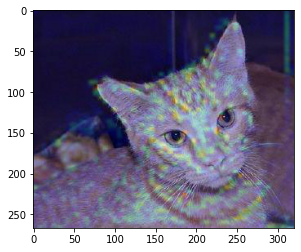

In [ ]:
# Display the part of the pictures used by the neural network to classify the pictures
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),
#                         subplot_kw={'xticks': [], 'yticks': []})

import matplotlib.pyplot as plt
img_path = '/content/drive/MyDrive/Research/Computer Vision/ImageClassification/DOGvsCOW/test/cats/cat.14.jpg'
img_array = preprocess_input(get_img_array(img_path, size=img_size))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
cam_path = save_and_display_gradcam(img_path, heatmap)
im = plt.imread(cam_path)
plt.imshow(im)